# Question 3: Does any specific type of religion affect the education levels?
What are the education levels of countries with different religions?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stb

edu_countries = pd.read_excel("EdStatsCountry.xls")
edu_countries_series = pd.read_excel("EdStatsCountry-Series.xls")
edu_data2 = pd.read_csv("EdStatsData.csv")
edu_footnote = pd.read_excel("EdStatsFootNote.xls")
edu_series = pd.read_excel("EdStatsSeries.xls")

religion_global = pd.read_excel("global.xls")
religion_national = pd.read_excel("national.xls")
religion_regional = pd.read_excel("regional.xls")

What are the education levels of countries with different religions?

#### Year 2005

In [34]:
smal_relig_pop_countries_df_05 = religion_national[religion_national.year==2005]
high_ed_levels_countries_df_05 = edu_data2[edu_data2['Indicator Code']=='BAR.NOED.15UP.ZS'][['Country Name',   'Country Code', 'Indicator Name', 'Indicator Code','2005']]

#### Year 2010

In [35]:
smal_relig_pop_countries_df_10 = religion_national[religion_national.year==2010]
high_ed_levels_countries_df_10 = edu_data2[edu_data2['Indicator Code']=='BAR.NOED.15UP.ZS'][['Country Name',   'Country Code', 'Indicator Name', 'Indicator Code','2010']]

In [36]:
high_ed_levels_countries_df_05.rename(columns={'Country Code':'code'}, inplace=True)
high_ed_levels_countries_df_10.rename(columns={'Country Code':'code'}, inplace=True)

In [49]:
small_relig_high_ed_countries_df_05 = small_relig_high_ed_countries_df_05 = pd.merge(smal_relig_pop_countries_df_05, high_ed_levels_countries_df_05, on="code")[["year", "state", "code", "Country Name", '2005'] + [x for x in smal_relig_pop_countries_df_05.columns if x.endswith("_percent")]]
small_relig_high_ed_countries_df_05.head(10)

small_relig_high_ed_countries_df_10 = small_relig_high_ed_countries_df_10 = pd.merge(smal_relig_pop_countries_df_10, high_ed_levels_countries_df_10, on="code")[["year", "state", "code", "Country Name", '2010'] + [x for x in smal_relig_pop_countries_df_10.columns if x.endswith("_percent")]]
small_relig_high_ed_countries_df_10

,year,state,code,Country Name,2010,protestant_percent,romancatholic_percent,easternorthodox_percent,anglican_percent,otherchristianity_percent,...,shinto_percent,baha‚Äôi_percent,taoism_percent,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,total_percent
0,2010,United States of America,USA,United States,0.35,0.3829,0.2507,0.0225,0.0155,0.0738,...,0.0005,0.0015,0.0000,0.0003,0.0003,0.0026,0.0057,0.1900,0.0025,1.0000
1,2010,Canada,CAN,Canada,0.67,0.2298,0.4202,0.0228,0.0789,0.0144,...,0.0000,0.0005,0.0001,0.0001,0.0001,0.0008,0.0021,0.1643,0.0010,1.0000
2,2010,Cuba,CUB,Cuba,7.67,0.0489,0.6000,0.0000,0.0000,0.0100,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0000,0.1315,0.0000,1.2934
3,2010,Dominican Republic,DOM,Dominican Republic,8.40,0.1500,0.7200,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1200,0.0100,1.0000
4,2010,Jamaica,JAM,Jamaica,5.71,0.6052,0.0202,0.0000,0.0261,0.0366,...,0.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.1994,0.1060,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2010,Kiribati,KIR,Kiribati,NaN,0.4100,0.5500,0.0000,0.0000,0.0000,...,0.0000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100,0.0099,1.0000
83,2010,Tuvalu,TUV,Tuvalu,NaN,0.9600,0.0099,0.0000,0.0000,0.0000,...,0.0000,0.0151,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070,0.0071,1.0001
84,2010,Tonga,TON,Tonga,0.73,0.4400,0.1300,0.0000,0.0191,0.3530,...,0.0000,0.0354,0.0000,0.0000,0.0000,0.0000,0.0000,0.0043,0.0159,0.9999
85,2010,Federated States of Micronesia,FSM,"Micronesia, Fed. Sts.",NaN,0.3019,0.5182,0.0000,0.0000,0.0451,...,0.0000,0.0072,0.0000,0.0000,0.0000,0.0030,0.0676,0.0315,0.0197,1.0000


In [51]:
small_relig_high_ed_countries_df_05['religion_sumpercent']

KeyError: 'religion_sumpercent'

ValueError: x and y must be the same size

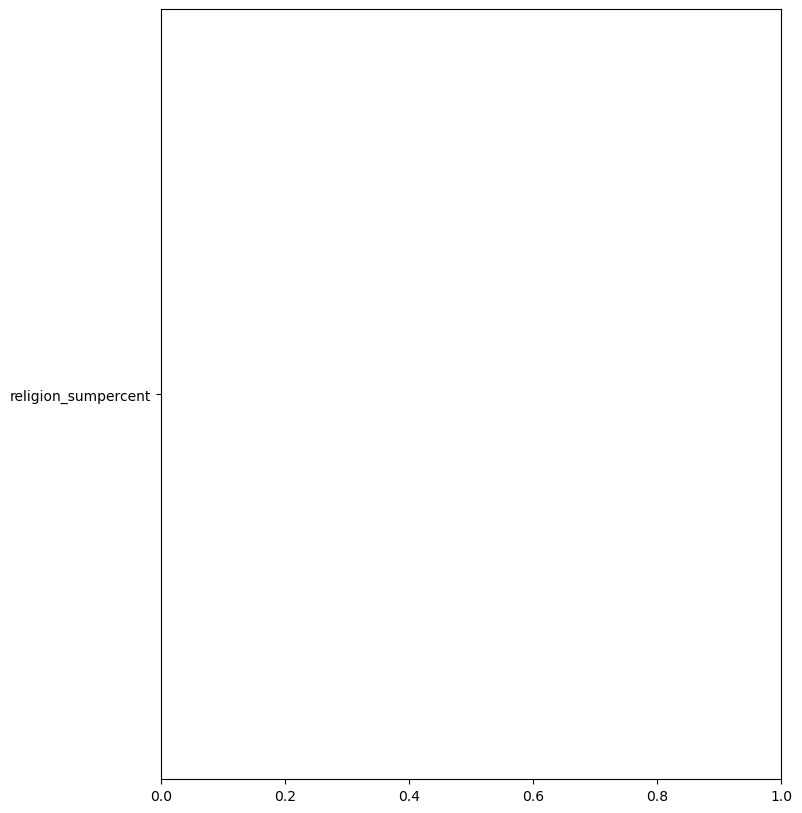

In [50]:
plt.figure(figsize=[8, 10])
plt.scatter(data=small_relig_high_ed_countries_df_05[:40], x='2005', y='religion_sumpercent')

### Correlation analysis

#### Year 2005

In [42]:
ed_rel_corr_df_05 = small_relig_high_ed_countries_df_05.drop("year", axis=1).corr()['2005'].dropna().drop('2005')
ed_rel_corr_df_05

protestant_percent          -0.091002
romancatholic_percent       -0.291599
easternorthodox_percent     -0.238850
anglican_percent            -0.007925
otherchristianity_percent    0.097324
christianity_percent        -0.439680
orthodox_percent            -0.092787
conservative_percent        -0.177081
reform_percent              -0.152889
otherjudaism_percent        -0.257199
judaism_percent             -0.099977
sunni_percent                0.522914
shi‚Äôa_percent              0.204472
alawite_percent             -0.034452
otherislam_percent          -0.037423
islam_percent                0.518580
mahayana_percent             0.056497
theravada_percent            0.099477
otherbuddhism_percent       -0.121500
buddhism_percent            -0.019143
zoroastrianism_percent      -0.103751
hinduism_percent             0.102311
sikhism_percent              0.091759
shinto_percent              -0.109606
baha‚Äôi_percent            -0.037123
taoism_percent              -0.122049
jainism_perc

#### Year 2010

In [44]:
ed_rel_corr_df_10 = small_relig_high_ed_countries_df_10.drop("year", axis=1).corr()['2010'].dropna().drop('2010')
ed_rel_corr_df_10

protestant_percent          -0.044827
romancatholic_percent       -0.279450
easternorthodox_percent     -0.252342
anglican_percent            -0.013846
otherchristianity_percent    0.134850
christianity_percent        -0.407341
orthodox_percent            -0.083301
conservative_percent        -0.159082
reform_percent              -0.136439
otherjudaism_percent        -0.249883
judaism_percent             -0.088706
sunni_percent                0.496673
shi‚Äôa_percent              0.221687
alawite_percent              0.014431
otherislam_percent          -0.109009
islam_percent                0.507340
mahayana_percent             0.070813
theravada_percent            0.114588
otherbuddhism_percent       -0.115027
buddhism_percent            -0.003245
zoroastrianism_percent      -0.093141
hinduism_percent             0.074743
sikhism_percent              0.078103
shinto_percent              -0.099246
baha‚Äôi_percent            -0.034012
taoism_percent              -0.068944
jainism_perc

In [52]:
plt.bar?